In [36]:
import pandas
import pyodbc
import matplotlib.pyplot as plt

In [37]:
server = "ey-finance.database.windows.net"
database = "finance"
username = "我的帳號"
password = "我的密碼"
driver = "{ODBC Driver 17 for SQL Server}"

conn = pyodbc.connect(f"DRIVER={driver};SERVER={server};PORT=1433;DATABASE={database};UID={username};PWD={password}")
symbol = "2330"
cursor= conn.cursor()

query = f"SELECT TradeDate, ClosePrice FROM [dbo].[DailyPrice] WHERE Symbol ='{symbol}' ORDER BY TradeDate;"
df = pandas.read_sql(query, conn, index_col="TradeDate", parse_dates="TradeDate")

<AxesSubplot:xlabel='TradeDate'>

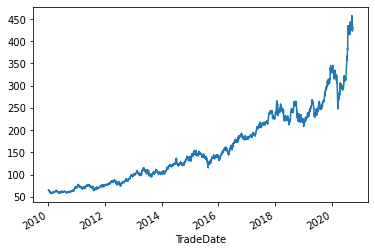

In [38]:
# 印出收盤價圖
c = df["ClosePrice"]
c.plot()

<AxesSubplot:xlabel='TradeDate'>

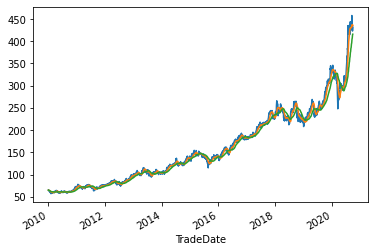

In [39]:
# 製作均線
c_5 = c.rolling(5, min_periods=1).mean()
c_20 = c.rolling(20, min_periods=1).mean()
c_60 = c.rolling(60, min_periods=1).mean()

# 印出均線圖
c.plot()
c_20.plot()
c_60.plot()

<AxesSubplot:xlabel='TradeDate'>

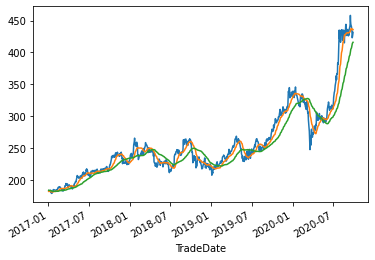

In [40]:
# 製作從2017年開始的線圖
# 觀察用
c["2017":].plot()
c_20["2017":].plot()
c_60["2017":].plot()

<AxesSubplot:xlabel='TradeDate'>

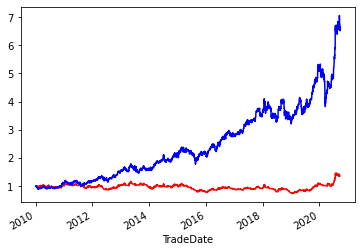

In [41]:
# case1: 價格穿過20日均線
# 買入訊號
signal = (c > c_20)

# 回測並跟大盤比較
(c.shift(-1) / c)[signal].cumprod().plot(color='red')
(c.shift(-1) / c).cumprod().plot(color='blue')

<AxesSubplot:xlabel='TradeDate'>

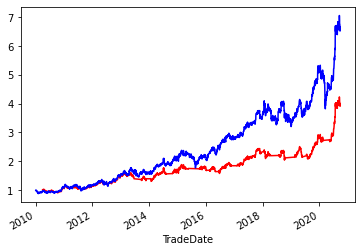

In [42]:
# case2: 20日線穿過60日線
# 買入訊號
signal = (c_20 > c_60)

# 回測並跟大盤比較
(c.shift(-1) / c)[signal].cumprod().plot(color='red')
(c.shift(-1) / c).cumprod().plot(color='blue')

<AxesSubplot:xlabel='TradeDate'>

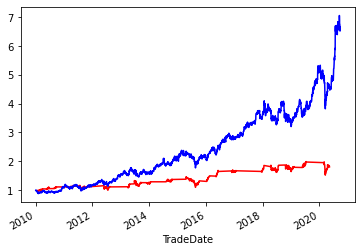

In [43]:
# case3: 60日線穿過20日線
# 買入訊號
signal = (c_60 > c_20)

# 回測並跟大盤比較
(c.shift(-1) / c)[signal].cumprod().plot(color='red')
(c.shift(-1) / c).cumprod().plot(color='blue')

<AxesSubplot:xlabel='TradeDate'>

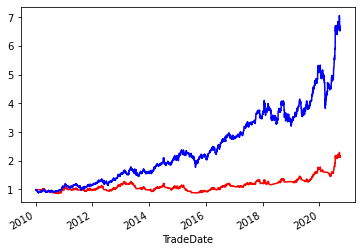

In [44]:
# case4: 價格穿過60日均線
# 買入訊號
signal = (c > c_60)

# 回測並跟大盤比較
(c.shift(-1) / c)[signal].cumprod().plot(color='red')
(c.shift(-1) / c).cumprod().plot(color='blue')

<AxesSubplot:xlabel='TradeDate'>

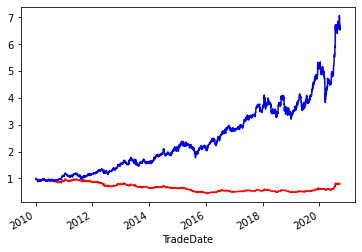

In [45]:
# case5: 價格穿過5日均線
# 買入訊號
signal = (c > c_5)

# 回測並跟大盤比較
(c.shift(-1) / c)[signal].cumprod().plot(color='red')
(c.shift(-1) / c).cumprod().plot(color='blue')

,c,c_5,增長率,signal
TradeDate,,,,
2010-01-04,64.9,64.900000,0.993837,False
2010-01-05,64.5,64.700000,1.006202,True
2010-01-06,64.9,64.766667,0.989214,False
2010-01-07,64.2,64.625000,0.996885,True
2010-01-08,64.0,64.500000,1.007812,True
...,...,...,...,...
2020-09-22,437.0,445.500000,0.991991,True
2020-09-23,433.5,440.600000,0.975779,True
2020-09-24,423.0,435.500000,1.002364,True


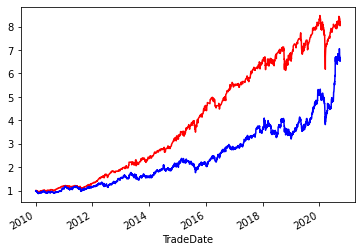

In [48]:
# case6: 價格低於5日均線
# 買入訊號
signal = (c < c_5)

# 回測並跟大盤比較
(c.shift(-1) / c)[signal].cumprod().plot(color='red')
(c.shift(-1) / c).cumprod().plot(color='blue')

pandas.DataFrame({'c':c, 'c_5':c_5, '增長率':c.shift(-1)/c, 'signal':signal})